<a href="https://colab.research.google.com/github/yasminabke/TP7/blob/master/projetEpidemio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
%matplotlib inline

#Création DataFrames
df_h1 = pd.read_csv('liver.csv')
df_h2 = pd.read_json('liver.json')

In [2]:
df_h1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0 mg/dL,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0 mg/dL,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0 mg/dL,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0 mg/dL,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0 mg/dL,3.9,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...
316,<20 yo,Male,14.0,5.0,269.0,58.0,45,6700.0 mg/dL,3.9,1.4,1
317,61 to 80 yo,Male,7.0,1.0,196.0,20.0,35,5800.0 mg/dL,2.0,0.5,1
318,61 to 80 yo,Male,28.0,13.0,250.0,NaN,29,2700.0 mg/dL,0.9,0.5,1
319,41 to 60 yo,Male,9.0,3.0,901.0,23.0,17,6200.0 mg/dL,3.5,1.2,1


In [3]:
df_h2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
286,21 to 40 yo,Female,0.8,0.2,192.0,15.0,12,8.6,4.7,1.20,1
287,41 to 60 yo,Male,1.3,0.6,155.0,15.0,20,8.0,4.0,1.00,2
288,41 to 60 yo,Female,1.0,0.5,239.0,16.0,39,7.5,3.7,NaN,1
289,41 to 60 yo,Male,4.5,2.3,315.0,120.0,105,7.0,4.0,NaN,1


In [4]:
print(df_h1.info())
print(df_h2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         321 non-null    object 
 1   Gender                      321 non-null    object 
 2   Total_Bilirubin             317 non-null    float64
 3   Direct_Bilirubin            320 non-null    float64
 4   Alkaline_Phosphotase        317 non-null    float64
 5   ALT                         254 non-null    float64
 6   AST                         321 non-null    int64  
 7   Total_Proteins              321 non-null    object 
 8   Albumin                     316 non-null    float64
 9   Albumin_and_Globulin_Ratio  262 non-null    float64
 10  Result                      321 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 27.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (

on remarque que pour Total_Proteins ce n'est pas le même type de variable : object pour le csv et float64 pour le json. Il faudra donc les convertir.
De plus, ALT, ASL et Result sont nommés différemment dans le df_h2: Alamine_Aminotransferase (ALT), Aspartate_Aminotransferase (ASL) et Outcome (result). Il faudra donc les renommer.

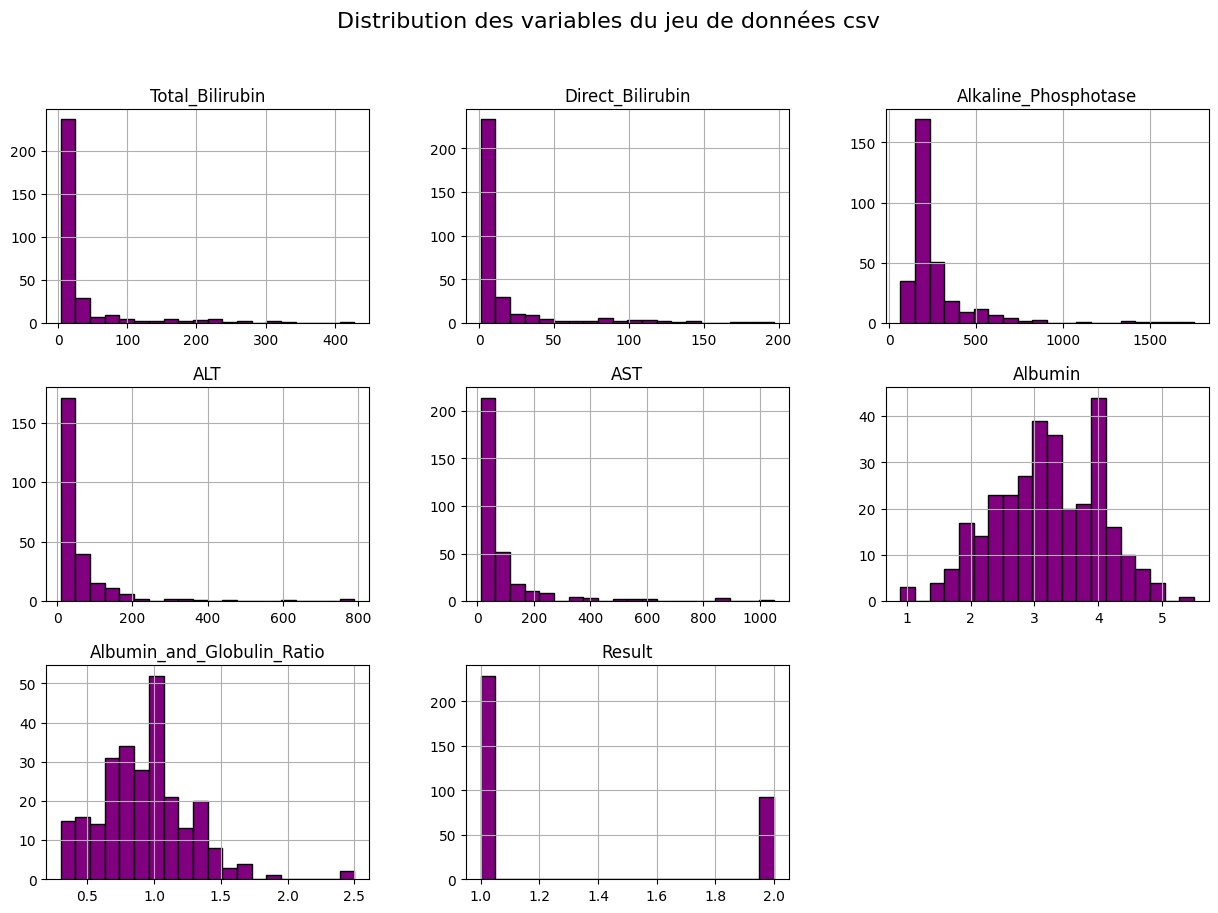

In [5]:
df_h1.hist(bins=20, figsize=(15, 10), color='purple', edgecolor='black')

#Titre et Affichage
plt.suptitle("Distribution des variables du jeu de données csv", fontsize=16)
plt.show()

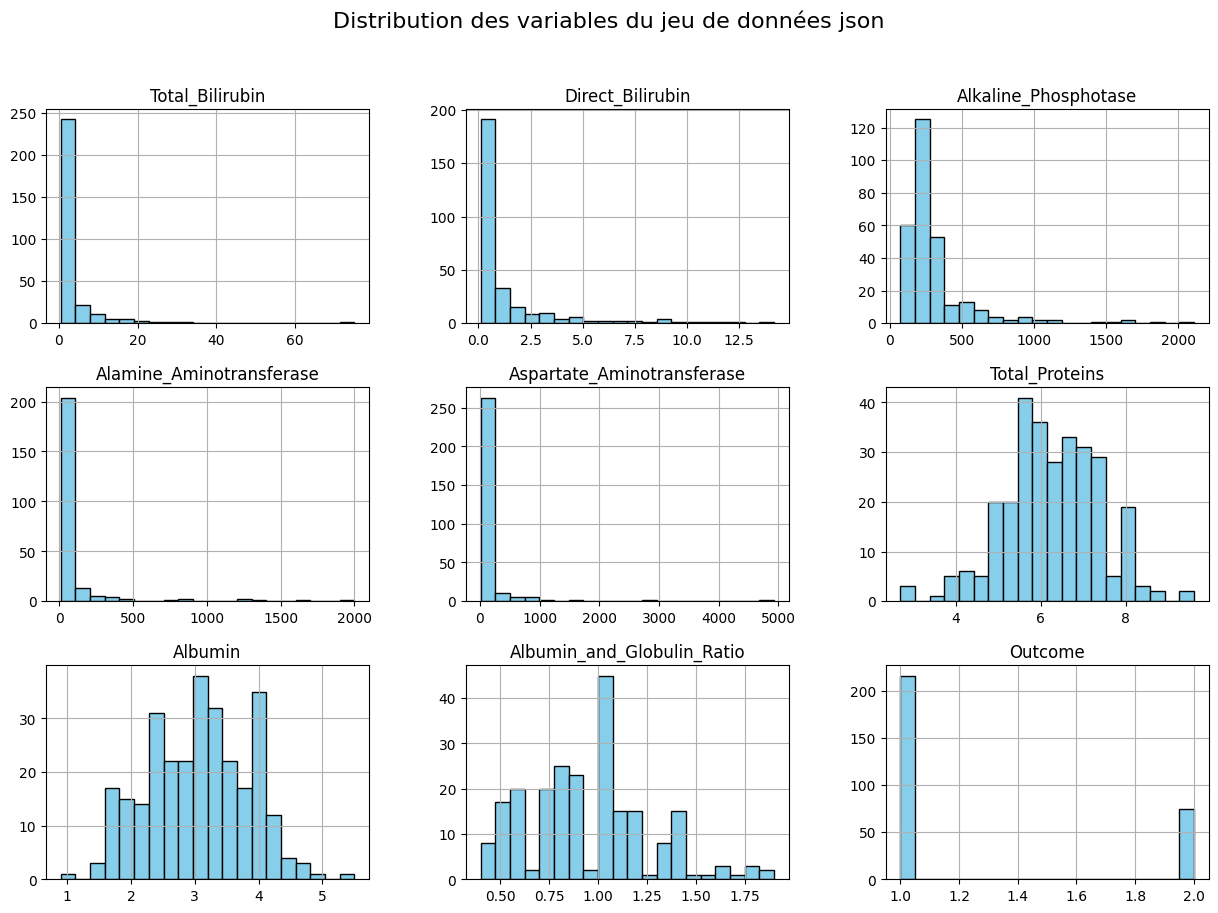

In [6]:
df_h2.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

#Titre et Affichage
plt.suptitle("Distribution des variables du jeu de données json", fontsize=16)
plt.show()

Le OUTCOME est désequilibrée

### Harmonisation de l'unité de la colonne Total_Proteins


pour cette fonction j'ai demandé à ChatGPT : peux tu me faire une fonction en te basant sur cet exemple def check_bmi_consistency(df):
    calculated_bmi = df["Weight"] / ((df["Height"]/100)**2)
    return (calculated_bmi.round(2)==df["BMI"].round(2))

check_bmi_consistency(df_combined).value_counts() pour le mettre en float et ma colonne Total_Proteins a des valeurs comme '7.4 g/dL', '740 mg/dL' ou 'nan mg/dL'

In [7]:
def check_protein_format(protein_str, unite):
    return isinstance(protein_str, str) and protein_str.endswith(unite)

def extract_protein_value(protein_str):
    if check_protein_format(protein_str, 'mg/dL'):
        protein_float = float(str.split(protein_str, ' ')[0])
        return protein_float /1000
    if check_protein_format(protein_str, 'g/dL'):
        protein_float = float(str.split(protein_str, ' ')[0])
        return protein_float * 1000 / 1000
    if check_protein_format(protein_str, 'nan mg/dL'):
        return np.nan

df_h1['Total_Proteins'] = df_h1['Total_Proteins'].apply(extract_protein_value)
df_h1.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7.8,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7.1,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7.7,4.3,NaN,2


# Harmonisation des unités de Total_Bilirubin et Direct_Bilirubin

Dans le jeu de données 1 et 2, le bilirubin est exprimée avec des unités différentes (en mm et en cm)

In [8]:
def harmonize_total_bilirubin(df):
    df['Total_Bilirubin'] = df['Total_Bilirubin'] * 10
    return df

df_h2 = harmonize_total_bilirubin(df_h2)
df_h2.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,61 to 80 yo,Female,7.0,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,109.0,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,73.0,4.1,490.0,NaN,68,7.0,3.3,NaN,1


In [9]:
def harmonize_direct_bilirubin(df):
    df['Direct_Bilirubin'] = df['Direct_Bilirubin']*10
    return df

df_h2 = harmonize_direct_bilirubin(df_h2)
df_h2.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,61 to 80 yo,Female,7.0,1.0,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,109.0,55.0,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,73.0,41.0,490.0,NaN,68,7.0,3.3,NaN,1


## bien renommer les colonnes

In [10]:
df_h2.rename(columns={'Age': 'Age'
                    , 'Gender': 'Gender'
                    , 'Total_Bilirubin': 'Total_Bilirubin'
                    , 'Direct_Bilirubin': 'Direct_Bilirubin'
                    , 'Alkaline_Phosphotase': 'Alkaline_Phosphotase'
                    , 'Alamine_Aminotransferase': 'ALT'
                    , 'Aspartate_Aminotransferase': 'AST'
                    , 'Total_Protiens': 'Total_Protiens'
                    , 'Albumin': 'Albumin'
                    , 'Albumin_and_Globulin_Ratio': 'Albumin_and_Globulin_Ratio'
                    , 'Outcome': 'Result'
                     }, inplace=True)
df_h2


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,61 to 80 yo,Female,7.0,1.0,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,109.0,55.0,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,73.0,41.0,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,10.0,4.0,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,39.0,20.0,195.0,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
286,21 to 40 yo,Female,8.0,2.0,192.0,15.0,12,8.6,4.7,1.20,1
287,41 to 60 yo,Male,13.0,6.0,155.0,15.0,20,8.0,4.0,1.00,2
288,41 to 60 yo,Female,10.0,5.0,239.0,16.0,39,7.5,3.7,NaN,1
289,41 to 60 yo,Male,45.0,23.0,315.0,120.0,105,7.0,4.0,NaN,1


Concaténation des jeux de données

In [11]:
df_combined = pd.concat([df_h1, df_h2])
df_combined

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7.8,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7.1,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7.7,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8.3,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8.0,3.9,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...
286,21 to 40 yo,Female,8.0,2.0,192.0,15.0,12,8.6,4.7,1.2,1
287,41 to 60 yo,Male,13.0,6.0,155.0,15.0,20,8.0,4.0,1.0,2
288,41 to 60 yo,Female,10.0,5.0,239.0,16.0,39,7.5,3.7,NaN,1
289,41 to 60 yo,Male,45.0,23.0,315.0,120.0,105,7.0,4.0,NaN,1


Retirer les doublons

In [12]:
doublons = df_combined[df_combined.duplicated()]
print(f"Nombre de doublons : {len(doublons)}")
print(doublons.head())

df_cleaned = df_combined.drop_duplicates()
df_cleaned

Nombre de doublons : 23
            Age  Gender  Total_Bilirubin  Direct_Bilirubin  \
1   61 to 80 yo    Male            109.0              55.0   
2   61 to 80 yo    Male             73.0              41.0   
19  21 to 40 yo  Female              9.0               3.0   
31  41 to 60 yo    Male              9.0               2.0   
34  21 to 40 yo  Female             26.0              12.0   

    Alkaline_Phosphotase    ALT  AST  Total_Proteins  Albumin  \
1                  699.0   64.0  100             7.5      NaN   
2                  490.0    NaN   68             7.0      3.3   
19                 293.0  232.0  245             6.8      3.1   
31                 156.0   35.0   44             4.9      2.9   
34                 410.0   59.0   57             5.6      3.0   

    Albumin_and_Globulin_Ratio  Result  
1                         0.74       1  
2                          NaN       1  
19                        0.80       1  
31                        1.40       1  
34     

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7.8,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7.1,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7.7,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8.3,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8.0,3.9,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...
286,21 to 40 yo,Female,8.0,2.0,192.0,15.0,12,8.6,4.7,1.2,1
287,41 to 60 yo,Male,13.0,6.0,155.0,15.0,20,8.0,4.0,1.0,2
288,41 to 60 yo,Female,10.0,5.0,239.0,16.0,39,7.5,3.7,NaN,1
289,41 to 60 yo,Male,45.0,23.0,315.0,120.0,105,7.0,4.0,NaN,1


# Visualisation graphique

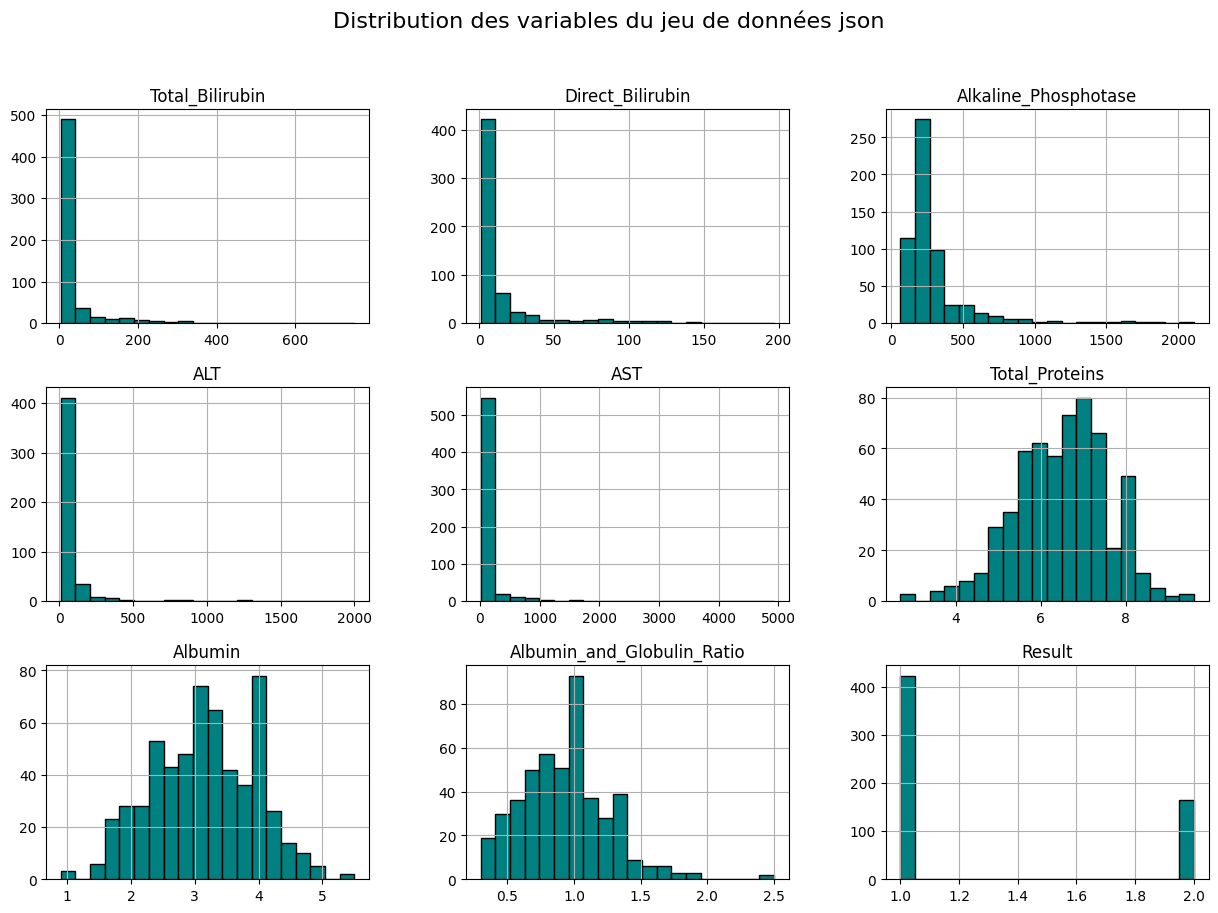

In [13]:
df_cleaned.hist(bins=20, figsize=(15, 10), color='teal', edgecolor='black')

plt.suptitle("Distribution des variables du jeu de données json", fontsize=16)
plt.show()

# Gestion des variables catégorielles (OneHotEncoding, puis LabelEncoding)

In [14]:
df_encoded = pd.get_dummies(data = df_combined, columns=['Gender'], dtype=int)
df_encoded

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result,Gender_Female,Gender_Male
0,41 to 60 yo,7.0,2.0,174.0,NaN,14,7.8,4.2,NaN,2,0,1
1,41 to 60 yo,6.0,2.0,245.0,22.0,24,7.1,3.4,0.9,1,0,1
2,21 to 40 yo,11.0,5.0,191.0,37.0,41,7.7,4.3,NaN,2,0,1
3,21 to 40 yo,24.0,10.0,340.0,25.0,21,8.3,4.5,NaN,1,0,1
4,21 to 40 yo,6.0,2.0,202.0,NaN,41,8.0,3.9,0.9,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
286,21 to 40 yo,8.0,2.0,192.0,15.0,12,8.6,4.7,1.2,1,1,0
287,41 to 60 yo,13.0,6.0,155.0,15.0,20,8.0,4.0,1.0,2,0,1
288,41 to 60 yo,10.0,5.0,239.0,16.0,39,7.5,3.7,NaN,1,1,0
289,41 to 60 yo,45.0,23.0,315.0,120.0,105,7.0,4.0,NaN,1,0,1


In [15]:
age_map = {'<20 yo': 0, '21 to 40 yo': 1, '41 to 60 yo': 2, '61 to 80 yo': 3, '>80 yo': 4}

df_encoded_2 = df_encoded.copy()
df_encoded_2['Age'] = df_encoded_2['Age'].map(age_map)

df_encoded_2

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result,Gender_Female,Gender_Male
0,2,7.0,2.0,174.0,NaN,14,7.8,4.2,NaN,2,0,1
1,2,6.0,2.0,245.0,22.0,24,7.1,3.4,0.9,1,0,1
2,1,11.0,5.0,191.0,37.0,41,7.7,4.3,NaN,2,0,1
3,1,24.0,10.0,340.0,25.0,21,8.3,4.5,NaN,1,0,1
4,1,6.0,2.0,202.0,NaN,41,8.0,3.9,0.9,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
286,1,8.0,2.0,192.0,15.0,12,8.6,4.7,1.2,1,1,0
287,2,13.0,6.0,155.0,15.0,20,8.0,4.0,1.0,2,0,1
288,2,10.0,5.0,239.0,16.0,39,7.5,3.7,NaN,1,1,0
289,2,45.0,23.0,315.0,120.0,105,7.0,4.0,NaN,1,0,1


In [16]:
# Afficher un aperçu des valeurs manquantes (méthode isna())
na_columns = df_encoded_2.columns[df_encoded.isna().any()].tolist()

df_encoded_2[na_columns].isna().sum()

,0
Total_Bilirubin,5
Direct_Bilirubin,5
Alkaline_Phosphotase,5
ALT,122
Total_Proteins,6
Albumin,6
Albumin_and_Globulin_Ratio,123


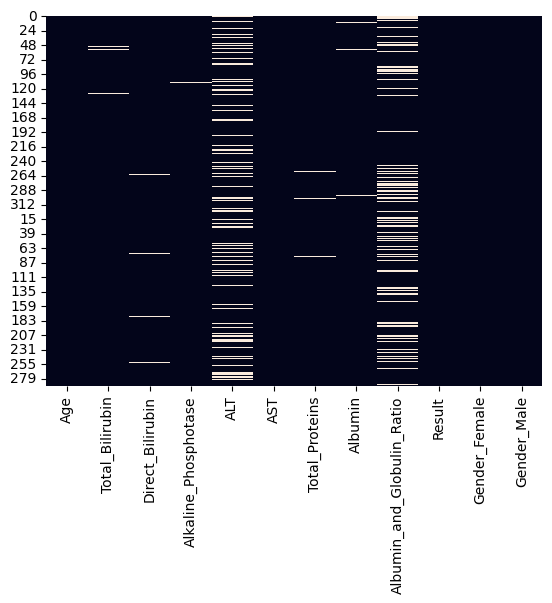

In [17]:
na_columns2 = seaborn.heatmap(df_encoded_2.isna(), cbar=False)

# Supprimer les lignes manquantes des colonnes avec un nombre faible de données manquantes

a partir de la certaines des fonctions sont celles du corrigé de l'atelier 2

In [18]:
df_dropped = df_encoded_2.dropna(subset=['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Total_Proteins', 'Albumin'])

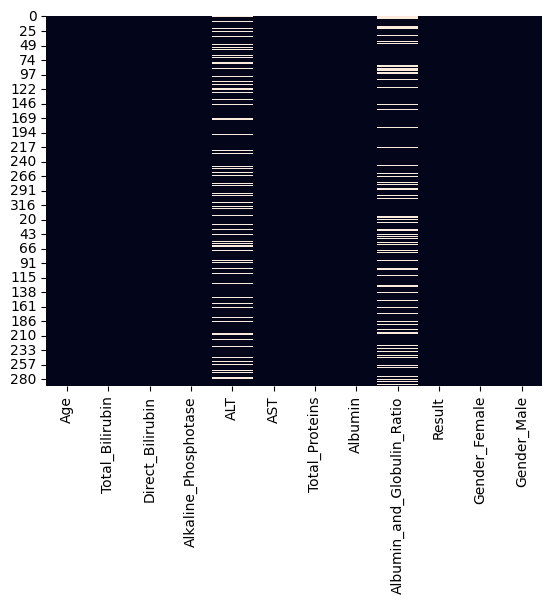

In [19]:
# Afficher un aperçu des valeurs manquantes (méthode isna())
na_columns = df_dropped.columns[df_dropped.isna().any()].tolist()

df_dropped[na_columns].isna().sum()
na_columns2 = seaborn.heatmap(df_dropped.isna(), cbar=False)

# Remplacement des valeurs manquantes avec KNN

In [20]:
def data_imputation(df, cols = []):
    int_columns = df.select_dtypes(include='int').columns.tolist()
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = df.copy()

    df_imputed[cols] = imputer.fit_transform(df_imputed[cols])
    df_imputed[int_columns] = df_imputed[int_columns].round(0).astype(int)

    return df_imputed

df_imputed = data_imputation(df_dropped, na_columns)
df_imputed

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result,Gender_Female,Gender_Male
0,2,7.0,2.0,174.0,82.286325,14,7.8,4.2,0.936638,2,0,1
1,2,6.0,2.0,245.0,22.000000,24,7.1,3.4,0.900000,1,0,1
2,1,11.0,5.0,191.0,37.000000,41,7.7,4.3,0.716000,2,0,1
3,1,24.0,10.0,340.0,25.000000,21,8.3,4.5,0.940000,1,0,1
4,1,6.0,2.0,202.0,371.000000,41,8.0,3.9,0.900000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
286,1,8.0,2.0,192.0,15.000000,12,8.6,4.7,1.200000,1,1,0
287,2,13.0,6.0,155.0,15.000000,20,8.0,4.0,1.000000,2,0,1
288,2,10.0,5.0,239.0,16.000000,39,7.5,3.7,0.750000,1,1,0
289,2,45.0,23.0,315.0,120.000000,105,7.0,4.0,0.974000,1,0,1


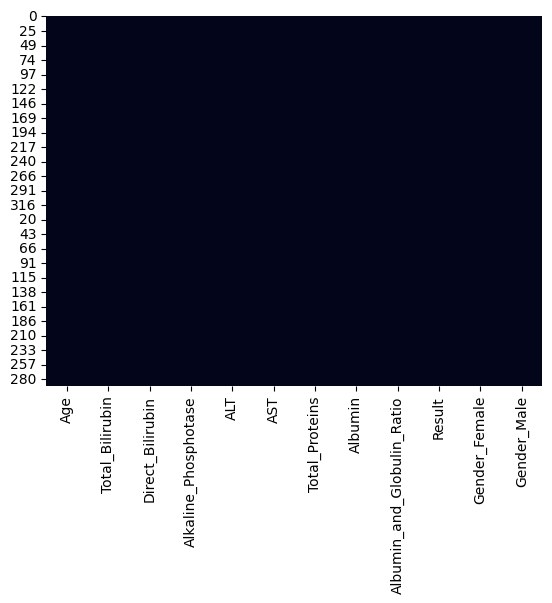

In [21]:
# Afficher un aperçu des valeurs manquantes (méthode isna())
na_columns = df_imputed.columns[df_imputed.isna().any()].tolist()

df_imputed[na_columns].isna().sum()
na_columns2 = seaborn.heatmap(df_imputed.isna(), cbar=False)


detect_outliers et remove_outliers c'était de mon atelier 2 mais j'avais certains éléments avec ChatGPT mais je ne retrouve pas le prompt

In [22]:

def detect_outliers(df, num_std=2, threshold=1):
    df_outliers = df.copy()
    means = df_outliers.mean()
    stds = df_outliers.std()
    df_outliers['Outlier_Count'] = ((df_outliers - means).abs() > num_std * stds).sum(axis=1)

    return df_outliers

#df_detect_outliers = detect_outliers(df_imputed,2,1)
#print(df_detect_outliers[df_detect_outliers['is_outlier']])



In [23]:
def remove_outliers(df, threshold, num_std):
    df_with_outliers = detect_outliers(df)
    df_without_outliers = df_with_outliers[df_with_outliers['Outlier_Count'] <= threshold].drop(columns='Outlier_Count')
    return df_without_outliers

df_outliers = remove_outliers(df_imputed,3,1)
df_outliers


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result,Gender_Female,Gender_Male
0,2,7.0,2.0,174.0,82.286325,14,7.8,4.2,0.936638,2,0,1
1,2,6.0,2.0,245.0,22.000000,24,7.1,3.4,0.900000,1,0,1
2,1,11.0,5.0,191.0,37.000000,41,7.7,4.3,0.716000,2,0,1
3,1,24.0,10.0,340.0,25.000000,21,8.3,4.5,0.940000,1,0,1
4,1,6.0,2.0,202.0,371.000000,41,8.0,3.9,0.900000,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
286,1,8.0,2.0,192.0,15.000000,12,8.6,4.7,1.200000,1,1,0
287,2,13.0,6.0,155.0,15.000000,20,8.0,4.0,1.000000,2,0,1
288,2,10.0,5.0,239.0,16.000000,39,7.5,3.7,0.750000,1,1,0
289,2,45.0,23.0,315.0,120.000000,105,7.0,4.0,0.974000,1,0,1


Gestion du déséquilibre du Result

In [24]:
print(df_outliers['Result'].value_counts())

def get_majority_class_df(df,column):
    # Dynamically find the majority class label
    majority_label = df[column].value_counts().idxmax()
    return df[df[column] == majority_label]

def get_minority_class_df(df,column):
    # Dynamically find the minority class label
    minority_label = df[column].value_counts().idxmin()
    return df[df[column] == minority_label]

def oversampling(df):
    df_minority = get_minority_class_df(df,'Result')
    df_majority = get_majority_class_df(df,'Result')
    df_minority_upsampled = resample(
        df_minority,
        replace=True,
        n_samples=len(df_majority),
        random_state=42 # for reproducibility
    )
    df_oversampled = pd.concat([df_majority, df_minority_upsampled])
    return df_oversampled

def undersampling(df):
    df_minority = get_minority_class_df(df,'Result')
    df_majority = get_majority_class_df(df,'Result')
    df_majority_downsampled = resample(
        df_majority,
        replace=False,
        n_samples=len(df_minority),
        random_state=42 # for reproducibility
    )
    df_undersampled = pd.concat([df_majority_downsampled, df_minority])
    return df_undersampled

def smote(df):
    X = df.drop('Result', axis=1)
    y = df['Result']
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)
    df_smote = pd.concat([X_smote, y_smote], axis=1)
    return df_smote


df_under = undersampling(df_outliers)
print(df_under['Result'].value_counts())
df_over = oversampling(df_outliers)
print(df_over['Result'].value_counts())
df_smote = smote(df_outliers)
print(df_smote['Result'].value_counts())
df_smote

Result
1    422
2    160
Name: count, dtype: int64
Result
1    160
2    160
Name: count, dtype: int64
Result
1    422
2    422
Name: count, dtype: int64
Result
2    422
1    422
Name: count, dtype: int64


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Result
0,2,7.000000,2.000000,174.000000,82.286325,14,7.800000,4.200000,0.936638,0,1,2
1,2,6.000000,2.000000,245.000000,22.000000,24,7.100000,3.400000,0.900000,0,1,1
2,1,11.000000,5.000000,191.000000,37.000000,41,7.700000,4.300000,0.716000,0,1,2
3,1,24.000000,10.000000,340.000000,25.000000,21,8.300000,4.500000,0.940000,0,1,1
4,1,6.000000,2.000000,202.000000,371.000000,41,8.000000,3.900000,0.900000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,43.953580,18.792363,133.428998,29.054654,95,5.457649,2.705191,0.957924,0,0,2
840,1,7.091206,2.000000,163.452763,21.729649,51,4.636809,1.472965,0.454560,0,0,2
841,1,41.357100,18.695289,1039.104187,56.851521,49,5.748326,2.547210,0.748326,0,1,2
842,2,7.000000,2.000000,207.366854,81.233787,30,4.669071,2.117268,0.923018,0,1,2


Pour cette fonction la seule chose que j'avais demandé à chatgpt c'était de me corrigé la ligne avec if. Sinon le reste c'est moi

In [25]:
def un_un(df, n):
  nb=0
  for i in range(len(df)):
    if df.loc[i, 'Gender_Male'] == 1 and df.loc[i, 'Gender_Female'] == 1:
        nb += 1
  return nb

df_verif = un_un(df_smote, na_columns)
df_verif


0

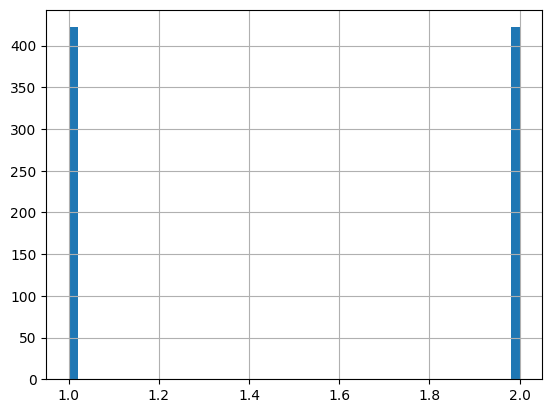

In [26]:
hist_df_smote = df_smote['Result'].hist(bins=50)

Vérification de la qualité des données


In [27]:
def compare_stats(df1, df2):
    # Calculer les statistiques descriptives pour chaque DataFrame
    stats_df1 = df1.describe().transpose()
    stats_df2 = df2.describe().transpose()

    # Créer un DataFrame pour stocker les différences relatives
    stats_diff = pd.DataFrame(index=stats_df1.index)

    # Calculer la moyenne combinée pour chaque colonne
    combined_mean = (stats_df1['mean'] + stats_df2['mean']) / 2

    # Calculer la différence relative des moyennes par rapport à la moyenne combinée
    stats_diff['mean_relative_distance'] = (stats_df1['mean'] - combined_mean) / combined_mean

    # Calculer la différence relative des médianes par rapport à la moyenne combinée
    combined_median = (df1.median() + df2.median()) / 2
    stats_diff['median_relative_distance'] = (df1.median() - combined_median) / combined_median

    # Calculer la différence relative des écarts-types par rapport à la moyenne combinée
    combined_std = (stats_df1['std'] + stats_df2['std']) / 2
    stats_diff['std_relative_distance'] = (stats_df1['std'] - combined_std) / combined_std

    return stats_diff

df_stats_comp_after_completion  = compare_stats(df_encoded_2, df_imputed)
df_stats_comp_after_balance = compare_stats(df_imputed, df_smote)
df_stats_comp_after_balance
df_stats_comp_after_completion

,mean_relative_distance,median_relative_distance,std_relative_distance
Age,0.002448,0.000000,0.001454
Total_Bilirubin,0.002031,0.000000,-0.003567
Direct_Bilirubin,0.001401,0.000000,-0.002135
Alkaline_Phosphotase,0.006459,0.004785,0.003678
ALT,-0.099701,-0.082803,0.005067
AST,-0.005195,0.000000,-0.009414
Total_Proteins,0.000606,0.003831,-0.002409
Albumin,-0.000842,0.000000,-0.001317
Albumin_and_Globulin_Ratio,-0.003015,-0.019949,0.042505
Result,-0.000064,0.000000,-0.000111


comparaison des Results selon le genre

In [28]:
df_smote['Result'] = df_smote['Result'] - 1 #transforme result en 0 et 1 a la place de 1 et 2

df_gender_pos = df_smote[df_smote['Result'] == 1][['Gender_Male', 'Gender_Female']].sum()
df_gender_neg = df_smote[df_smote['Result'] == 0][['Gender_Male', 'Gender_Female']].sum()

print("Result=1:", df_gender_pos)
print("Result=0:", df_gender_neg)

df_gender_neg - df_gender_pos

Result=1: Gender_Male      255
Gender_Female     73
dtype: int64
Result=0: Gender_Male      333
Gender_Female     89
dtype: int64


,0
Gender_Male,78
Gender_Female,16


Normalisation des données

In [29]:
def min_max_scaling(df):
    scaler = MinMaxScaler()
    outcome = df['Result']
    features = df.drop(columns=['Result'])

    features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    df_normalized = pd.concat([features_normalized, outcome.reset_index(drop=True)], axis=1)

    return df_normalized

df_normalized = min_max_scaling(df_smote)
df_normalized

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Result
0,0.50,0.004021,0.005102,0.054226,0.036325,0.000813,0.739130,0.717391,0.289381,0.0,1.0,1
1,0.50,0.002681,0.005102,0.088911,0.006030,0.002846,0.637681,0.543478,0.272727,0.0,1.0,0
2,0.25,0.009383,0.020408,0.062531,0.013568,0.006302,0.724638,0.739130,0.189091,0.0,1.0,1
3,0.25,0.026810,0.045918,0.135320,0.007538,0.002236,0.811594,0.782609,0.290909,0.0,1.0,0
4,0.25,0.002681,0.005102,0.067904,0.181407,0.006302,0.768116,0.652174,0.272727,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.25,0.053557,0.090777,0.034406,0.009575,0.017280,0.399659,0.392433,0.299056,0.0,0.0,1
840,0.25,0.004144,0.005102,0.049073,0.005894,0.008335,0.280697,0.124558,0.070255,0.0,0.0,1
841,0.25,0.050077,0.090282,0.476846,0.023543,0.007928,0.441786,0.358089,0.203785,0.0,1.0,1
842,0.50,0.004021,0.005102,0.070526,0.035796,0.004066,0.285373,0.264623,0.283190,0.0,1.0,1


Standardisation

In [30]:
def standardisation(df):
    scaler = StandardScaler()
    outcome = df['Result']
    features = df.drop(columns=['Result'])
    features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    df_standardized = pd.concat([features_normalized, outcome.reset_index(drop=True)], axis=1)
    return df_standardized

df_standardized = standardisation(df_smote)
df_standardized

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male,Result
0,0.518498,-0.358166,-0.387995,-0.429509,-0.002786,-0.302870,1.253367,1.286436,-0.145804,-0.487377,0.659829,1
1,0.518498,-0.377379,-0.387995,-0.097367,-0.414993,-0.260953,0.576186,0.232475,-0.277290,-0.487377,0.659829,0
2,-0.680440,-0.281314,-0.261228,-0.349982,-0.312431,-0.189694,1.156627,1.418181,-0.937622,-0.487377,0.659829,1
3,-0.680440,-0.031544,-0.049950,0.347049,-0.394480,-0.273528,1.737069,1.681671,-0.133740,-0.487377,0.659829,0
4,-0.680440,-0.377379,-0.387995,-0.298523,1.971287,-0.189694,1.446848,0.891201,-0.277290,-0.487377,0.659829,0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,-0.680440,0.351826,0.321576,-0.619302,-0.366757,0.036658,-1.012629,-0.682901,-0.069416,-0.487377,-1.515544,1
840,-0.680440,-0.356414,-0.387995,-0.478849,-0.416841,-0.147777,-1.806711,-2.306298,-1.875866,-0.487377,-1.515544,1
841,-0.680440,0.301940,0.317475,3.617499,-0.176696,-0.156161,-0.731427,-0.891033,-0.821611,-0.487377,0.659829,1
842,0.518498,-0.358166,-0.387995,-0.273417,-0.009983,-0.235803,-1.775501,-1.457461,-0.194685,-0.487377,0.659829,1


Matrice de corréation

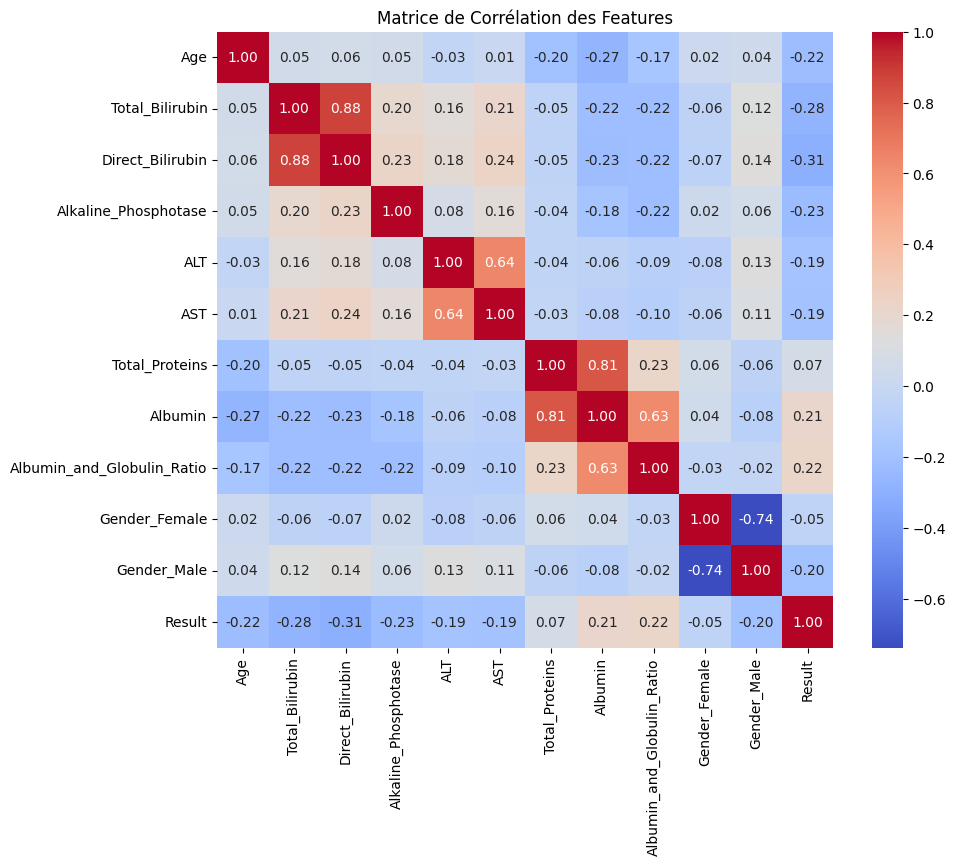

In [31]:
correlation_matrix = df_standardized.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation des Features')
plt.show()

Sélection des features

In [32]:
def select_features(df):
    corr_target = correlation_matrix['Result'].abs().sort_values(ascending=False)
    selected_features = corr_target[corr_target > 0.2].index.tolist()
    print(selected_features)
    return df[selected_features]

select_features(df_standardized)


['Result', 'Direct_Bilirubin', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Age', 'Albumin_and_Globulin_Ratio', 'Albumin', 'Gender_Male']


,Result,Direct_Bilirubin,Total_Bilirubin,Alkaline_Phosphotase,Age,Albumin_and_Globulin_Ratio,Albumin,Gender_Male
0,1,-0.387995,-0.358166,-0.429509,0.518498,-0.145804,1.286436,0.659829
1,0,-0.387995,-0.377379,-0.097367,0.518498,-0.277290,0.232475,0.659829
2,1,-0.261228,-0.281314,-0.349982,-0.680440,-0.937622,1.418181,0.659829
3,0,-0.049950,-0.031544,0.347049,-0.680440,-0.133740,1.681671,0.659829
4,0,-0.387995,-0.377379,-0.298523,-0.680440,-0.277290,0.891201,0.659829
...,...,...,...,...,...,...,...,...
839,1,0.321576,0.351826,-0.619302,-0.680440,-0.069416,-0.682901,-1.515544
840,1,-0.387995,-0.356414,-0.478849,-0.680440,-1.875866,-2.306298,-1.515544
841,1,0.317475,0.301940,3.617499,-0.680440,-0.821611,-0.891033,0.659829
842,1,-0.387995,-0.358166,-0.273417,0.518498,-0.194685,-1.457461,0.659829


['Result', 'Direct_Bilirubin', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Age', 'Albumin_and_Globulin_Ratio', 'Albumin', 'Gender_Male']


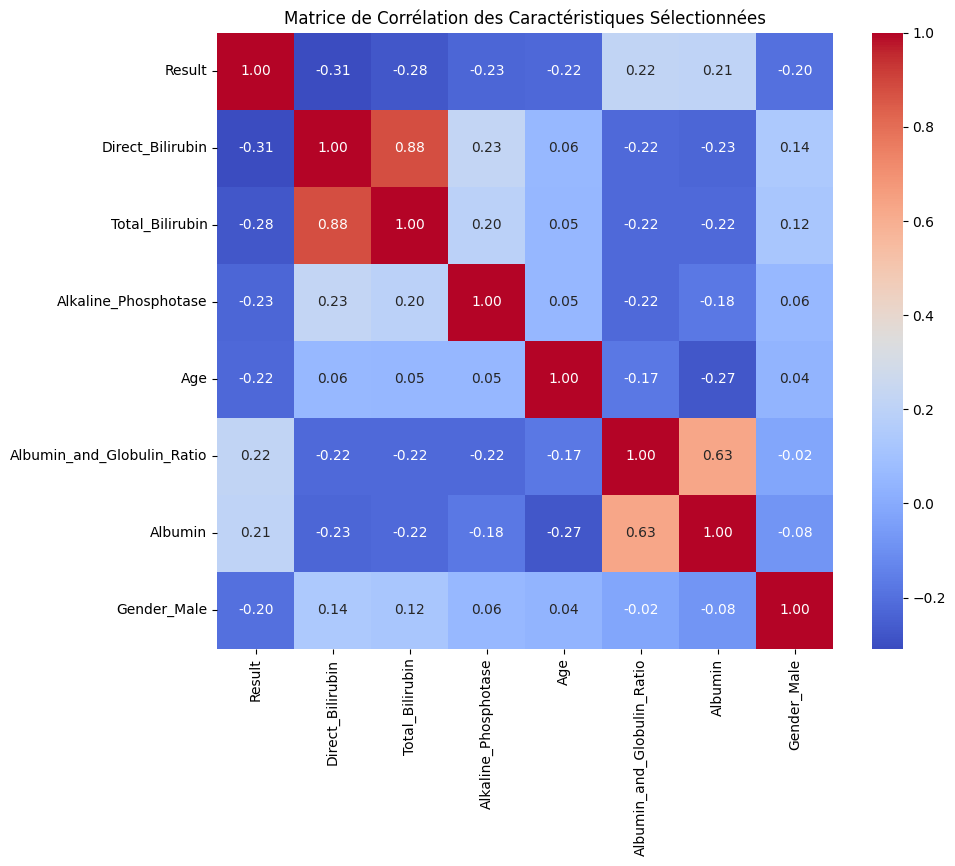

In [33]:
df_selected_features = select_features(df_standardized)
correlation_matrix_selected = df_selected_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation des Caractéristiques Sélectionnées')
plt.show()

# Sauvegarde du nouveau fichier

In [34]:
select_features(df_standardized).to_csv('BERKANE_MAYTRAUD_Projet.csv', index=False)

['Result', 'Direct_Bilirubin', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Age', 'Albumin_and_Globulin_Ratio', 'Albumin', 'Gender_Male']
